In [285]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

import math
import warnings
%matplotlib inline 

In [286]:
names = [
                    "PassengerId", 
                     "Survived",
                     "Pclass",
                     "Name",
                     "Sex",
                     "Age",
                     "SibSp",
                     "Parch",
                     "Ticket",
                     "Fare",
                     "Cabin",
                     "Embarked"
        ]

In [287]:
#ground_truth of data
train = pd.read_csv("train.csv",na_values="?")
test = pd.read_csv("test.csv",na_values="?")

In [290]:
#copies of data
train_copy = train.copy(deep=True)
test_copy = test.copy(deep = True)

In [291]:
data_arr = [train_copy,test_copy]

In [292]:
train_copy.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [293]:
test_copy.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [294]:
num_samples=train_copy.shape[0]
num_attributes = train_copy.shape[1]

In [295]:
print ("The titanic dataset contains {} observations".format(num_samples))
print ("The titanic dataset contains {} attributes".format(num_attributes))

The titanic dataset contains 891 observations
The titanic dataset contains 12 attributes


In [297]:
#Explore the data
print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Testing data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [298]:
# clean the data ~> get ride of NaN values
for data in data_arr:
    
    data['Age'].fillna(data['Age'].median(),inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
    data['Fare'].fillna(data['Fare'].median(),inplace=True)


In [299]:
#per the rules; we are supposed to drop cabin number from training set
drop_columns = ["PassengerId","Cabin","Ticket"]
train_copy.drop(drop_columns,axis = 1,inplace=True)
test_copy.drop(drop_columns,axis=1,inplace=True)

In [300]:
#double check the cleaning went as planned
print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Testing data
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [301]:
#train_copy still has the 'survived' column
print(train_copy.shape)
print(test_copy.shape)

(891, 9)
(418, 8)


In [302]:
#We will have to perform feature mapping on the 'object' type columns
print("Training data information")
train_copy.info()
print("-"*10)
print("Testing data information")
test_copy.info()

Training data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
----------
Testing data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [303]:
#feature engineering
for d in data_arr:
    
    #family size
    d['FamilySize'] = d['SibSp'] + d['Parch'] + 1
    d['IsAlone'] = 1
    
    d['IsAlone'].loc[d['FamilySize'] > 1] = 0
    
    #title
    d["Title"] = d['Name'].str.split(",",expand=True)[1].str.split('.',expand=True)[0]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [305]:
#double check the cleaning went as planned
print("Training data information")
print(train_copy["Title"].value_counts())

Training data information
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Lady              1
 Capt              1
 Mme               1
 Don               1
 Ms                1
 the Countess      1
 Jonkheer          1
 Sir               1
Name: Title, dtype: int64


In [306]:
#eliminate misc titles
min_occurences = 10
#creates a series indexed by title
title_names  = (train_copy['Title'].value_counts() > min_occurences)
print(title_names)

 Mr               True
 Miss             True
 Mrs              True
 Master           True
 Dr              False
 Rev             False
 Col             False
 Major           False
 Mlle            False
 Lady            False
 Capt            False
 Mme             False
 Don             False
 Ms              False
 the Countess    False
 Jonkheer        False
 Sir             False
Name: Title, dtype: bool


In [307]:
train_copy['Title'] = train_copy["Title"].apply(lambda x: x if title_names.loc[x] == True else 'Misc')

In [308]:
print("Here are the relevant titles...")
print(train_copy["Title"].value_counts())

Here are the relevant titles...
 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64


In [309]:
print("Let's double check the data one more time...")
print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

Let's double check the data one more time...
This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare   

In [310]:
print(train_copy.shape)
print(test_copy.shape)

(891, 12)
(418, 11)


In [311]:
#convert formats
#age
#title
#embarked
label = LabelEncoder()

In [312]:
for d in data_arr:
    d["Title"] = label.fit_transform(d['Title'])
    d["Embarked"] = label.fit_transform(d['Embarked'])
    d["Age"] = label.fit_transform(d['Age'])
    d["Name"] = label.fit_transform(d["Name"])
    d["Sex"] = label.fit_transform(d["Sex"])

In [313]:
print("After some feature mapping...")
print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

After some feature mapping...
This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null int64
dtypes: float64(1), int64(11)
memory usage: 83.6 KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked

In [314]:
train_copy.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [315]:
test_copy.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [316]:
print ("Training data shape: {}".format(train_copy.shape))
print ("Testing date shape: {}".format(test_copy.shape))

Training data shape: (891, 12)
Testing date shape: (418, 11)


In [317]:
Y_train  = train_copy['Survived']
train_copy.drop(['Survived'],axis=1,inplace=True)

In [318]:
print ("After dropping the 'Survived' column ...")
print(train_copy.shape)
print(test_copy.shape)

After dropping the 'Survived' column ...
(891, 11)
(418, 11)


In [319]:
X_train = train_copy.copy(deep = True)

In [340]:
#convert to numpy.ndarrays
X_train = X_train.values
Y_train = Y_train.values

In [341]:
acc_train_logreg = []

In [342]:
acc_test_logreg = []

In [343]:
c_logreg = [0.1,1,10,100,1000]

In [344]:
def logreg_model(c, X_train, Y_train,penalty):
    '''
        Author: Kyle Ong
        Date: 05/13/2018
        
        fits a sklearn.linear_model.LogisticRegression(penalty = penalty, C=c, solver='saga')
        to X_train and Y_train
        
        c: type: float
        penalty: type: string
        X_train: type: numpy.ndarray
        Y_train: type: numpy.ndarray
    
    '''
    logreg = linear_model.LogisticRegression(penalty=penalty, C=c ,solver='saga')
    
    with warnings.catch_warnings():
        
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            logreg.fit(X_train,Y_train)
            
            y_hat = logreg.predict(X_train)
            acc_train = np.mean(Y_train == y_hat)
            print("This is the trainning accuracy with {} loss and {} c_val: {}".format(penalty,c, acc_train))
            
        except Warning as w:
            print(w)

In [345]:
logreg_model(100,X_train,Y_train,"L1")

This is the trainning accuracy with L1 loss and 100 c_val: 0.6734006734006734


In [346]:
def train_logistic_model_with(X_train,Y_train,params):
    '''
            Author: Kyle Ong
            Date: 05/12/2018
            
            will train sklearn.linear_model.LogisticRegression(penalty = penalty, C=c_val,solver='saga) over params
            
            X_train: type: numpy.ndarray
            Y_train: type: numpy.ndarray
            params: type: dict: {penalty:[c_vals]}
    '''
    for k,v in params.items():
        
        penalty = k
        acc_train_array = []

        for c_val in v:
            #this is baest coding skills
            log_model = 1
            if penalty.lower() == "l1" :
                log_model = linear_model.LogisticRegression(penalty=penalty, C=c_val,solver='saga')
            
            elif penalty.lower() == 'l2':
                log_model = linear_model.LogisticRegression( C=c_val)
                
            with warnings.catch_warnings():
                
                warnings.filterwarnings('ignore', category=ConvergenceWarning)
                
                try:
                     #fit the model
                    log_model.fit(X_train,Y_train)  
                    #train the model
                    Y_hat = log_model.predict(X_train)
            
                    train_acc = np.mean(Y_hat == Y_train)
            
                    acc_train_array.append(train_acc)
                    print("Accuracy with {} loss and c_val {} : {}".format(penalty,c_val,train_acc))
                
                except Warning as w:
                    print (w)
            

      
        

In [347]:
params = {
    "L1":[0.1,1,10,100],
    "L2":[0.1,1,10,100]
         }

In [348]:
train_logistic_model_with(X_train,Y_train,params)

Accuracy with L1 loss and c_val 0.1 : 0.6734006734006734
Accuracy with L1 loss and c_val 1 : 0.6734006734006734
Accuracy with L1 loss and c_val 10 : 0.6734006734006734
Accuracy with L1 loss and c_val 100 : 0.6734006734006734
Accuracy with L2 loss and c_val 0.1 : 0.7968574635241302
Accuracy with L2 loss and c_val 1 : 0.8069584736251403
Accuracy with L2 loss and c_val 10 : 0.8069584736251403
Accuracy with L2 loss and c_val 100 : 0.8058361391694725


In [349]:
# apply feature transformations!
from sklearn.preprocessing import PolynomialFeatures

In [350]:
poly = PolynomialFeatures(2)

In [351]:
X_train_transformed = poly.fit_transform(X_train)
labels = X_train_transformed.shape[1]
observations = X_train_transformed.shape[0]

In [352]:
print ("The transformed titanic dataset has {} observations.".format(observations))
print("The titanic dataset has {} labels".format(labels))

The transformed titanic dataset has 891 observations.
The titanic dataset has 78 labels


In [353]:
train_logistic_model_with(X_train_transformed,Y_train,params)

Accuracy with L1 loss and c_val 0.1 : 0.6745230078563412
Accuracy with L1 loss and c_val 1 : 0.6734006734006734
Accuracy with L1 loss and c_val 10 : 0.6745230078563412
Accuracy with L1 loss and c_val 100 : 0.6734006734006734
Accuracy with L2 loss and c_val 0.1 : 0.8237934904601572
Accuracy with L2 loss and c_val 1 : 0.8282828282828283
Accuracy with L2 loss and c_val 10 : 0.8271604938271605
Accuracy with L2 loss and c_val 100 : 0.8237934904601572


In [354]:
#split the trainning set into test and training set
split = math.floor(num_samples*0.5)

X_train_split = X_train[0 : split, :]
X_test_split = X_train[split: , :  ]
Y_train_split = Y_train[0:split]
Y_test_split = Y_train[split: ]

In [355]:
print("Training observations has shape: {}".format(X_train_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Testing observations has shape: {}".format(X_test_split.shape))

Training observations has shape: (445, 11)
Training targets has shape: (445,)
Testing observations has shape: (446, 11)


In [356]:
def test_logistic_model_with(X_train,Y_train,X_test,Y_test,params):
    '''
            Author: Kyle Ong
            Date 05/13/2018
            
            trains and tests linear_model.LogisticRegression()
            
            X_train:type: numpy.ndarray
            Y_train: type: numpy.ndarray
            X_test: type: numpy.ndarray
            Y_test: type: numpy.ndarray
            params: type: dict {penalty : [c_val]}
    '''
    for k,v in params.items():
        
        penalty = k
        acc_train_array = []
        acc_test_arr = []

        for c_val in v:
            #this is baest coding skills
            log_model = 1
            if penalty.lower() == "l1" :
                log_model = linear_model.LogisticRegression(penalty=penalty, C=c_val,solver='saga')
            
            elif penalty.lower() == 'l2':
                log_model = linear_model.LogisticRegression( C=c_val)
               
            #uncoment context manager in order to get the convergence warning!
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=ConvergenceWarning)
                try:
                     #fit the model
                    log_model.fit(X_train,Y_train)  
                
                    #train the model
                    Y_hat = log_model.predict(X_train)
                    train_acc = np.mean(Y_hat == Y_train)
                    acc_train_array.append(train_acc)
                    print("Training() ~> Accuracy with {} loss and c_val {} : \n{}".format(penalty,c_val,train_acc))
                
                    #test the model
                    Y_hat_test = log_model.predict(X_test)
                    acc_test =np.mean(Y_test == Y_hat_test)
                    acc_test_arr.append(acc_test)
                    print("Testing ~> Accuracy with {} loss and c_val {}: \n{}".format(penalty,c_val,acc_test))
                    
                
                except Warning as w:
                    print(w)
                    
        plt.plot(v,acc_test_arr)
        plt.xlabel('C values')
        plt.ylabel('Test accuracy')
                


Training() ~> Accuracy with L1 loss and c_val 0.1 : 
0.6629213483146067
Testing ~> Accuracy with L1 loss and c_val 0.1: 
0.6748878923766816
Training() ~> Accuracy with L1 loss and c_val 1 : 
0.6629213483146067
Testing ~> Accuracy with L1 loss and c_val 1: 
0.6748878923766816
Training() ~> Accuracy with L1 loss and c_val 10 : 
0.6629213483146067
Testing ~> Accuracy with L1 loss and c_val 10: 
0.6748878923766816
Training() ~> Accuracy with L1 loss and c_val 100 : 
0.6629213483146067
Testing ~> Accuracy with L1 loss and c_val 100: 
0.6748878923766816
Training() ~> Accuracy with L2 loss and c_val 0.1 : 
0.8044943820224719
Testing ~> Accuracy with L2 loss and c_val 0.1: 
0.7825112107623319
Training() ~> Accuracy with L2 loss and c_val 1 : 
0.8089887640449438
Testing ~> Accuracy with L2 loss and c_val 1: 
0.7802690582959642
Training() ~> Accuracy with L2 loss and c_val 10 : 
0.8157303370786517
Testing ~> Accuracy with L2 loss and c_val 10: 
0.7869955156950673
Training() ~> Accuracy with L2 l

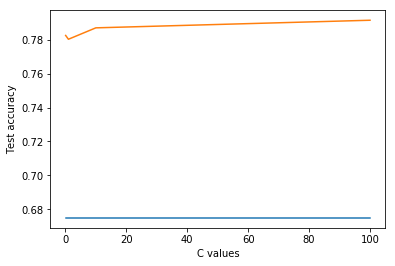

In [357]:
test_logistic_model_with(X_train_split,Y_train_split,X_test_split,Y_test_split,params)

In [358]:
X_train_split_transformed = poly.fit_transform(X_train_split)
X_test_split_transformed = poly.fit_transform(X_test_split)

In [359]:
print(X_train_split_transformed.shape)

(445, 78)


In [360]:
train_logistic_model_with(X_train_split_transformed,Y_train_split,params)

Accuracy with L1 loss and c_val 0.1 : 0.6539325842696629
Accuracy with L1 loss and c_val 1 : 0.651685393258427
Accuracy with L1 loss and c_val 10 : 0.6539325842696629
Accuracy with L1 loss and c_val 100 : 0.6539325842696629
Accuracy with L2 loss and c_val 0.1 : 0.8359550561797753
Accuracy with L2 loss and c_val 1 : 0.8359550561797753
Accuracy with L2 loss and c_val 10 : 0.8359550561797753
Accuracy with L2 loss and c_val 100 : 0.8314606741573034


Training() ~> Accuracy with L1 loss and c_val 0.1 : 
0.6539325842696629
Testing ~> Accuracy with L1 loss and c_val 0.1: 
0.6636771300448431
Training() ~> Accuracy with L1 loss and c_val 1 : 
0.6539325842696629
Testing ~> Accuracy with L1 loss and c_val 1: 
0.6636771300448431
Training() ~> Accuracy with L1 loss and c_val 10 : 
0.6539325842696629
Testing ~> Accuracy with L1 loss and c_val 10: 
0.6636771300448431
Training() ~> Accuracy with L1 loss and c_val 100 : 
0.6539325842696629
Testing ~> Accuracy with L1 loss and c_val 100: 
0.6636771300448431
Training() ~> Accuracy with L2 loss and c_val 0.1 : 
0.8292134831460675
Testing ~> Accuracy with L2 loss and c_val 0.1: 
0.7892376681614349
Training() ~> Accuracy with L2 loss and c_val 1 : 
0.8269662921348314
Testing ~> Accuracy with L2 loss and c_val 1: 
0.7892376681614349
Training() ~> Accuracy with L2 loss and c_val 10 : 
0.8359550561797753
Testing ~> Accuracy with L2 loss and c_val 10: 
0.7959641255605381
Training() ~> Accuracy with L2 l

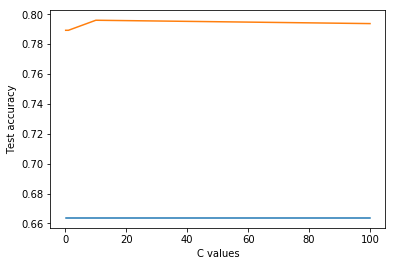

In [361]:
test_logistic_model_with(X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,params)

In [362]:
# let's try support vector machines!
from sklearn import svm

In [363]:
def svm_linear(c,X_train,Y_train,X_test,Y_test):
    '''
            Author: Kyle Ong
            Date: 05/13/2018
            
            fits a svm.SVC(probability = False, kernel = 'linear', C = c) to X_train and Y_train
            calculates the training and test accuracies 
            
            c: type: int
            X_train: numpy.ndarray
            Y_train: numpy.ndarray
            X_test: numpy.ndarray
            Y_test: numpy.ndarray
            
            will ignore convergence warnings thrown by sklearn
    
    '''
    
    linear = svm.SVC(probability=False, kernel='linear',C=c)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        
        try:

            linear.fit(X_train,Y_train)
            
            Y_hat_train = linear.predict(X_train)
            train_acc =np.mean(Y_hat_train == Y_train)
            print("Training ~> This is the training accuracy with Linear kernel and c_val {}: {}".format(c,train_acc))
            
            
            Y_hat_test = linear.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            linear_test_acc.append(test_acc)
            print("Testing ~> This is the testing accuracy with Linear kernel and c_val {}:  {}".format(c,test_acc))
        
        except Warning as w:
            print(w)
            
            

In [364]:
c_vals = [0.1,1,10,100]

In [365]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,X_train_split,Y_train_split,X_test_split,Y_test_split)

Training ~> This is the training accuracy with Linear kernel and c_val 0.1: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 0.1:  0.773542600896861
Training ~> This is the training accuracy with Linear kernel and c_val 1: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 1:  0.7780269058295964
Training ~> This is the training accuracy with Linear kernel and c_val 10: 0.8157303370786517
Testing ~> This is the testing accuracy with Linear kernel and c_val 10:  0.7847533632286996
Training ~> This is the training accuracy with Linear kernel and c_val 100: 0.8202247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 100:  0.7869955156950673


Text(0,0.5,'linear kernel test accuracies')

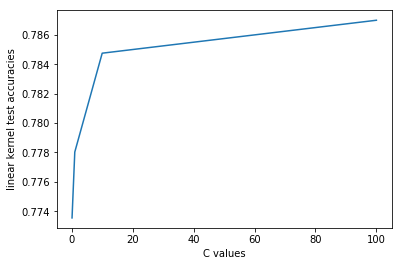

In [366]:
plt.plot(c_vals,linear_test_acc)
plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

In [ ]:
linear_test_acc_ = []
for c in c_vals:
    svm_linear(c,X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split)

Training ~> This is the training accuracy with Linear kernel and c_val 0.1: 0.8067415730337079
Testing ~> This is the testing accuracy with Linear kernel and c_val 0.1:  0.7847533632286996


In [ ]:
def svm_rbf(c,X_train,Y_train,X_test,Y_test,gamma):
    '''
        Author: Kyle Ong
        Date: 05/13/2018
        
        will fit a svm.SVC(probability = False, kernel = 'rbf', gamma = gamma) to X_train and Y_train
        will calculate the train accuracy
        will calcuate the test accuracy
        
        c: type: int
        X_train: numpy.ndarray
        Y_train: numpy.ndarray
        X_test: numpy.ndarray
        Y_test: numpy.ndarray
        gamma: int
        
        will ignore convergence warnings thrown by sklearn    
    '''
    
    svm_rbf = svm.SVC(probability=False, kernel='rbf',gamma=gamma)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            svm_rbf.fit(X_train,Y_train)
            
            Y_hat_train = svm_rbf.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,train_acc))
            
            Y_hat_test = svm_rbf.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,test_acc))
            rbf_test_acc.append(test_acc)
            
        except Warning as w:
            print(w)


In [ ]:
params = {
    0.1: [0.1,1,10,100],
    1 :  [0.1,1,10,100],
    10 :  [0.1,1,10,100],
    100 :  [0.1,1,10,100]
}

In [ ]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split,Y_train_split,X_test_split,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

In [ ]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

In [ ]:
def svm_poly(X_train,Y_train,X_test,Y_test,c_val,degree):
    '''
        Author: Kyle Ong
        Date: 03/16/2018
        
        X_train : type: numpy.ndarray
        Y_train : type: numpy.ndarray
        X_test: type: numpy.ndarray
        Y_test: type: numpy.ndarray
        c_val : type: int
        degree : type: int
        
        will train a sklearn.svm.SVC(probability = False, kernel = "poly", degree=degree ) on X_train, Y_train
        will calculate accuracy for X_train and X_test
        will ignore convergence warnings thrown by sklearn
    '''
    
    svm_poly = svm.SVC(probability = False, kernel = "poly", C=c_val,degree=degree)
    svm_poly.fit(X_train,Y_train)
    
    with warnings.catch_warnings():
        
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            
            Y_hat_train = svm_poly.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,train_acc))
            
            Y_hat_test = svm_poly.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,test_acc))
            
        except Warning as w:
            print(w)


In [ ]:
params = {
        1:[0.1,1,10,100],
        2:[0.1,1,10,100],
        3:[0.1,1,10,100]
}

In [ ]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_split,Y_train_split,X_test_split,Y_test_split,c,d)

In [ ]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,c,d)